# 01_board_detect

_Minimal code + short comments. Load config → read first video frame → warp board → split 8×8 → preview & save._

In [1]:
# imports
import os, glob, cv2, numpy as np
import matplotlib.pyplot as plt
from Chess_Detection_Competition.utils import load_config, ensure_dir
from Chess_Detection_Competition.board import warp_board, split_grid
# display helper
def imshow_rgb(img, title=None, size=(6,6)):
    plt.figure(figsize=size)
    if img.ndim==2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title: plt.title(title)
    plt.axis('off')


In [2]:
# 1) load config + pick first video (safe version)
from Chess_Detection_Competition.utils import _project_root

cfg = load_config()
ROOT = _project_root()
video_dir = ROOT / cfg["paths"]["videos_dir"]

videos = sorted(video_dir.glob("*.mp4"))
assert videos, f"No videos found in {video_dir}"

video_path = videos[0]
print("Using video:", video_path.name)

Using video: 2_Move_rotate_student.mp4


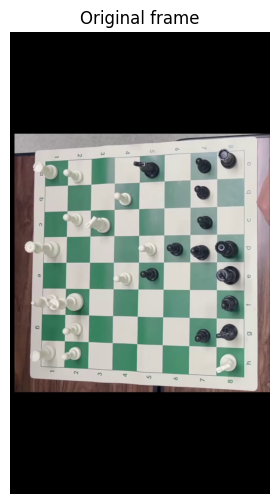

In [3]:
# # 2) read the first frame
# cap = cv2.VideoCapture(video_path)
# ok, frame = cap.read()
# cap.release()
# assert ok, "Cannot read first frame"

# imshow_rgb(frame, "Original frame", size=(6,6))

# === Cell 1: read first frame (ใช้ video_path จาก cell ของคุณ) ===
cap = cv2.VideoCapture(str(video_path))
ok, frame = cap.read()
cap.release()
assert ok and frame is not None, f"Cannot read first frame: {video_path}"

imshow_rgb(frame, "Original frame", size=(4,6))



Warped image shape: (800, 800, 3)
Homography matrix shape: (3, 3)
Homography matrix:
[[ 8.15375682e-01  2.04492169e-02 -6.93244534e+01]
 [-1.89697311e-02  7.56383333e-01 -3.01041504e+02]
 [ 5.87795851e-11  2.95018272e-12  1.00000000e+00]]


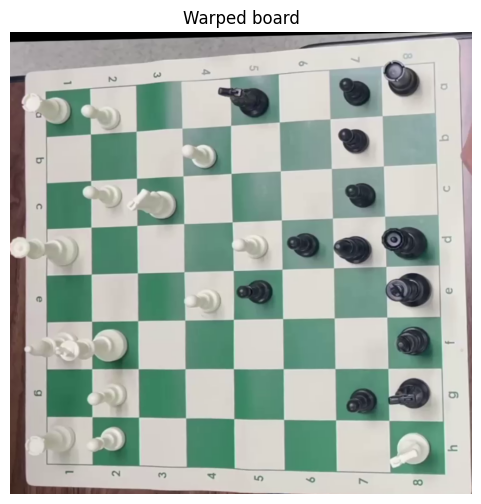

In [4]:
# # 3) warp board (homography) → top-down square
# warped, _ = warp_board(frame, cfg)
# imshow_rgb(warped, "Warped board", size=(6,6))

# === Cell 2: warp board (fixed) ===
warped, aux = warp_board(frame, cfg)
assert warped is not None and warped.size > 0, "warp_board() returned empty image"

# ตรวจสอบผลลัพธ์
print(f"Warped image shape: {warped.shape}")

if aux is not None:
    if hasattr(aux, 'shape'):  # ถ้าเป็น numpy array
        print(f"Homography matrix shape: {aux.shape}")
        print(f"Homography matrix:\n{aux}")
    elif isinstance(aux, dict) and 'H' in aux:  # ถ้าเป็น dictionary
        print(f"Homography matrix found: {aux['H'].shape}")
    else:
        print(f"aux type: {type(aux)}, content: {aux}")
else:
    print("No aux data returned")
    
imshow_rgb(warped, "Warped board", size=(6,6))




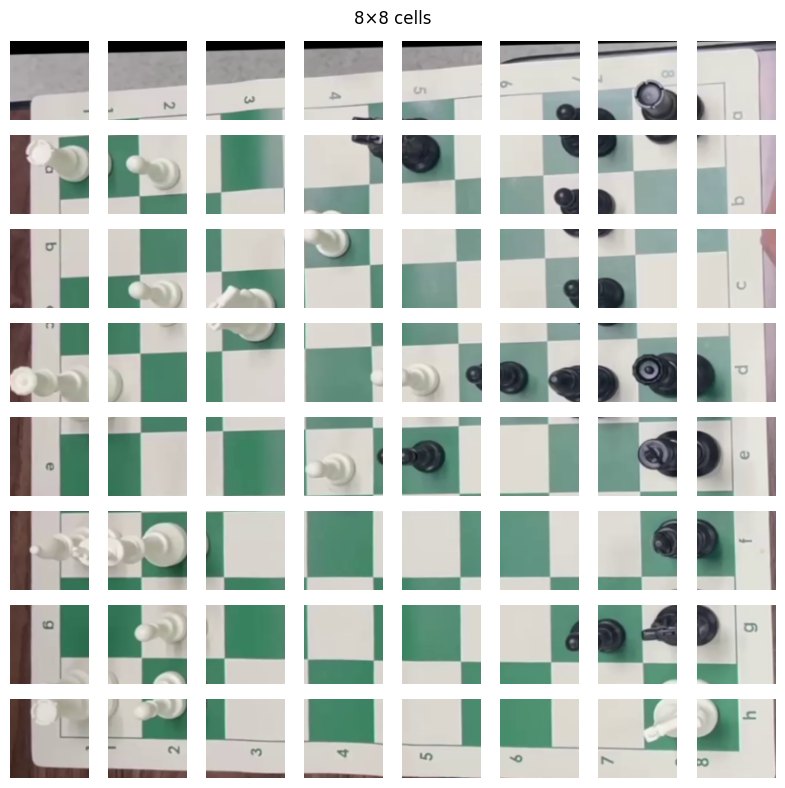

In [5]:
# # 4) split into 8×8 cells and preview as a grid
# cell_px = cfg["cells"]["img_size"]
# cells = split_grid(warped, cell_px)

# # show a compact 8x8 grid
# fig, axes = plt.subplots(8,8, figsize=(8,8))
# k = 0
# for r in range(8):
#     for c in range(8):
#         _, patch = cells[k]; k+=1
#         axes[r,c].imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
#         axes[r,c].axis('off')
# fig.suptitle("8×8 cells")
# plt.tight_layout()

# === Cell 3: Split into 8x8 cells and preview ===
cell_px = int(cfg["cells"]["img_size"])
cells = split_grid(warped, cell_px)  # ใช้ภาพ warped หลัง normalize จาก Cell 2

import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
k = 0
for r in range(8):
    for c in range(8):
        _, patch = cells[k]; k += 1
        axes[r, c].imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
        axes[r, c].axis("off")
fig.suptitle("8×8 cells")
plt.tight_layout()
plt.show()


In [6]:
# 5) save debug images (optional)
ensure_dir("debug")
cv2.imwrite(os.path.join("debug","first_frame.jpg"), frame)
cv2.imwrite(os.path.join("debug","warped.jpg"), warped)
print("Saved to debug/first_frame.jpg and debug/warped.jpg")


Saved to debug/first_frame.jpg and debug/warped.jpg
